In [56]:
import pandas as pd
import os, time, glob, sys
from collections import Counter
import mne
import numpy as np
import matplotlib.pyplot as plt

# Import data (subwise - response & raw)

In [57]:
subjects = ['cey','lyj','kjy']
test_cond = 'sad-cong'
control_cond = 'sad-incong'
data_path = 'C:/Users/USER/Downloads/eeg-fnirs-face-word-eeg/preprocessed_eeg/'

test_evokeds = []
control_evokeds = []
# test group
for sub in subjects:
    evoked_path =  data_path + f'{sub}/{sub}-{test_cond}-ave.fif'
    evoked = mne.read_evokeds(evoked_path)[0]
    test_evokeds.append(evoked)

for sub in subjects:
    evoked_path =  data_path + f'{sub}/{sub}-{control_cond}-ave.fif'
    evoked = mne.read_evokeds(evoked_path)[0]
    control_evokeds.append(evoked)

Reading C:\Users\USER\Downloads\eeg-fnirs-face-word-eeg\preprocessed_eeg\cey\cey-sad-cong-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms (sad_cong)
        0 CTF compensation matrices available
        nave = 28 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading C:\Users\USER\Downloads\eeg-fnirs-face-word-eeg\preprocessed_eeg\lyj\lyj-sad-cong-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms (sad_cong)
        0 CTF compensation matrices available
        nave = 30 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading C:\Users\USER\Downloads\eeg-fnirs-face-word-eeg\preprocessed_eeg\kjy\kjy-sad-cong-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...    

In [58]:
test_average = mne.grand_average(test_evokeds)
control_average = mne.grand_average(control_evokeds)

Identifying common channels ...
Identifying common channels ...


In [59]:
# montage 설정: standard_1020
montage = mne.channels.make_standard_montage("standard_1020")
test_average.set_montage(montage)

Condition,Grand average (n = 3)
Data kind,average
Timepoints,301 samples
Channels,27 channels
Number of averaged epochs,3
Time range (secs),-0.20000000298023224 – 0.9999999970197677
Baseline (secs),-0.200 – 0.000 s


# Analysis

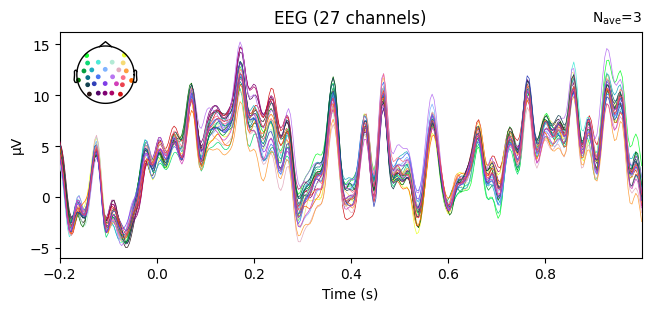

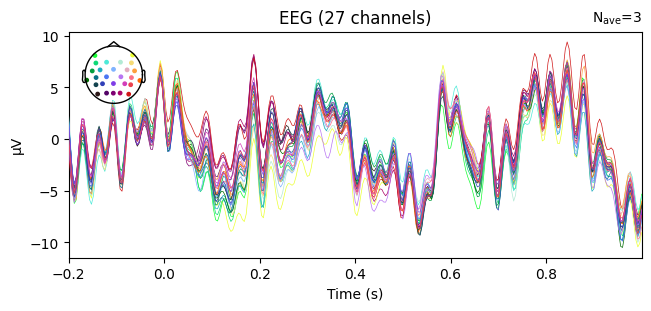

In [60]:
fig = test_average.plot()

fig = control_average.plot()

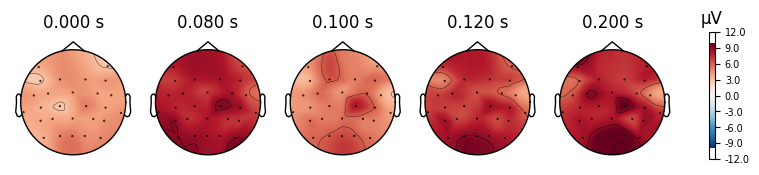

No projector specified for this dataset. Please consider the method self.add_proj.


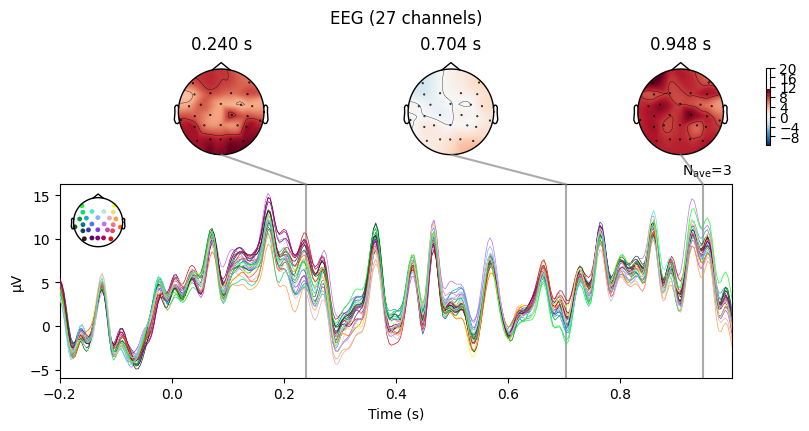

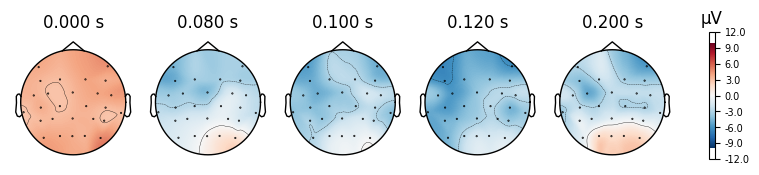

No projector specified for this dataset. Please consider the method self.add_proj.


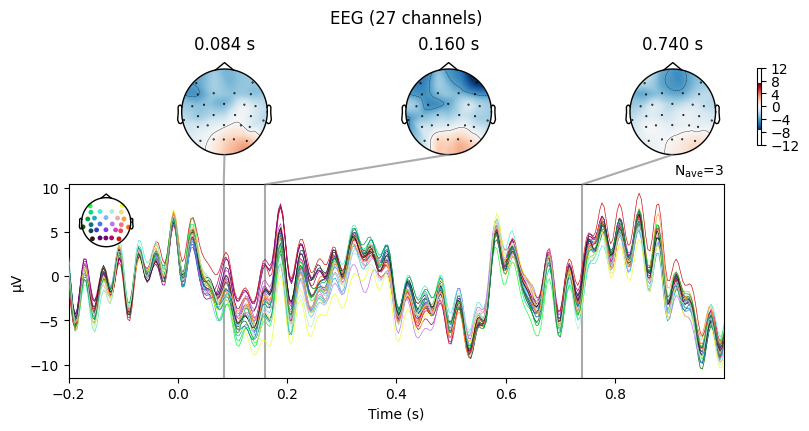

In [64]:
test_average.plot_topomap(
    times=[0.0, 0.08, 0.1, 0.12, 0.2],     # 원하는 시간점
    ch_type='eeg',
    show_names=False,
    vlim=(-10,10))
plt.close()

test_average.plot_joint(picks="eeg")
plt.close()

control_average.plot_topomap(
    times=[0.0, 0.08, 0.1, 0.12, 0.2],     # 원하는 시간점
    ch_type='eeg',
    show_names=False,
    vlim=(-10,10))
plt.close()

control_average.plot_joint(picks="eeg")
plt.close()

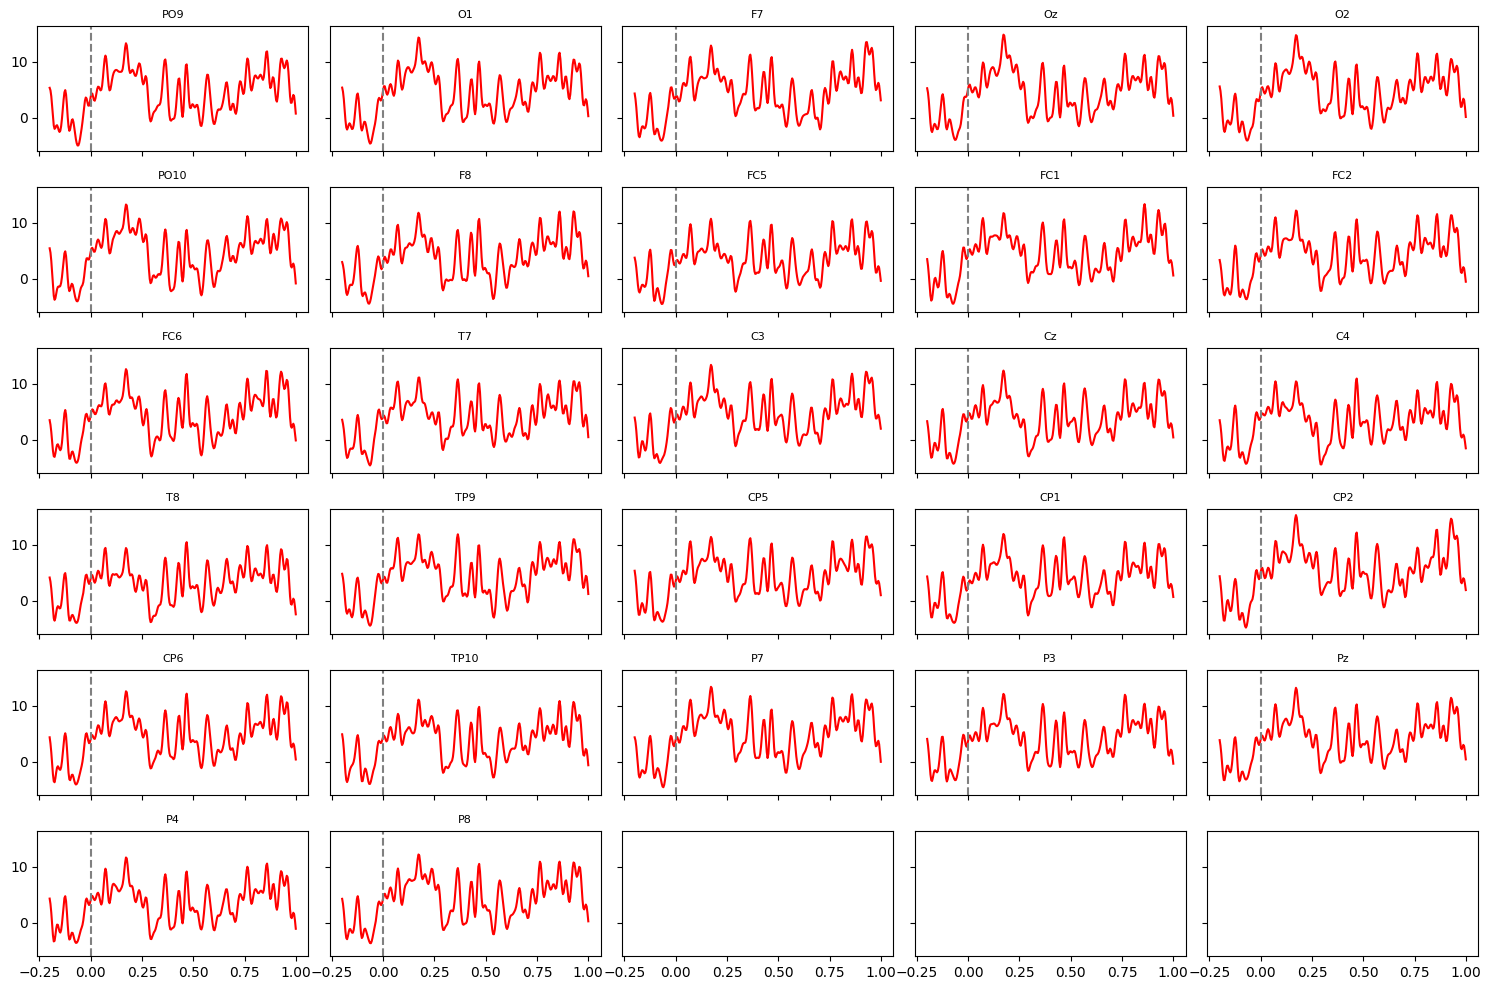

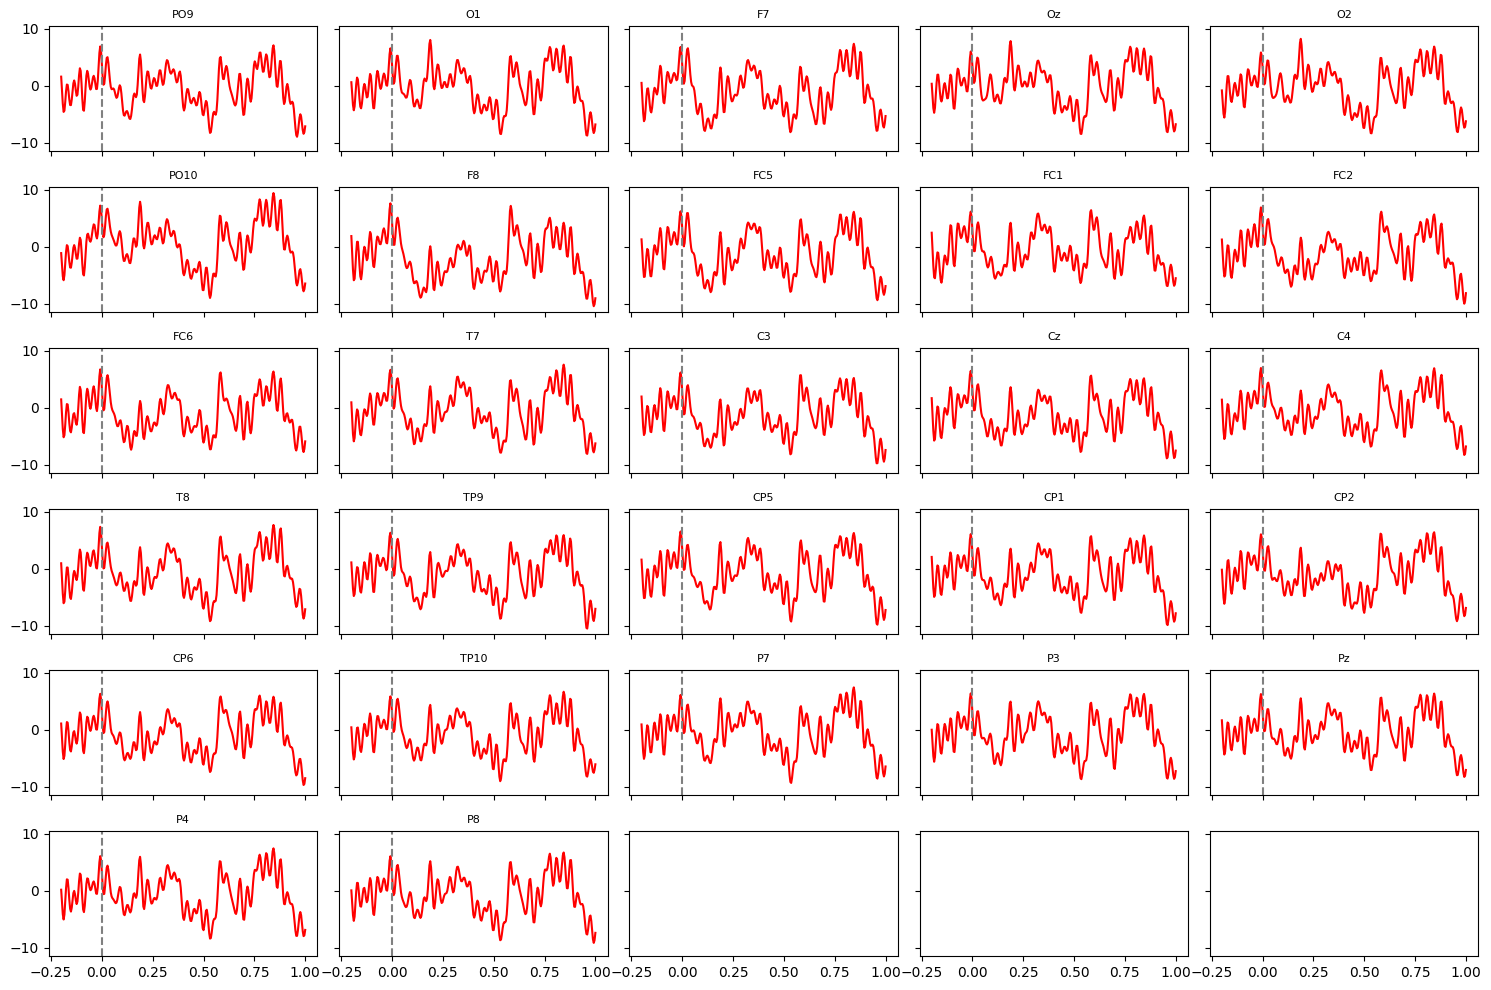

In [62]:
data = test_average.data * 1e6  # V → μV
times = test_average.times
ch_names = test_average.ch_names

n_channels = len(ch_names)
n_rows = 6
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(n_channels):
    axes[i].plot(times, data[i], color='r')
    axes[i].set_title(ch_names[i], fontsize=8)
    axes[i].axvline(0, color='gray', linestyle='--')  # 자극 시간선

#fig.suptitle("ERP per Channel - Happy", fontsize=16)
plt.tight_layout()
plt.show()

data = control_average.data * 1e6  # V → μV
times = control_average.times
ch_names = control_average.ch_names

n_channels = len(ch_names)
n_rows = 6
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(n_channels):
    axes[i].plot(times, data[i], color='r')
    axes[i].set_title(ch_names[i], fontsize=8)
    axes[i].axvline(0, color='gray', linestyle='--')  # 자극 시간선

#fig.suptitle("ERP per Channel - Sad", fontsize=16)
plt.tight_layout()
plt.show()